In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  
from matplotlib import patches
from astropy.utils import data
data.conf.remote_timeout = 60
#from spectral_cube import SpectralCube

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from random import randint
from astropy.wcs import WCS
import cleaners as c
import beambar as bb
import mass as mass

In [2]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = ''
mom0 = '_mom0'
mom1 = '_mom1'
mask = '_mask'
out = 'subcubes/'
outloc = loc+vers+name

In [4]:
data_image = fits.getdata(fullname+image+ext)
header_image = fits.getheader(fullname+image+ext)
data_mom1 = fits.getdata(fullname+mom1+ext)
header_mom1 = fits.getheader(fullname+mom1+ext)
data_mom0 = fits.getdata(fullname+mom0+ext)
header_mom0 = fits.getheader(fullname+mom0+ext)
data_mask = fits.getdata(fullname+mask+ext)
header_mask = fits.getheader(fullname+mask+ext)

print(type(data_mom0))
print(data_mom0.shape)
print(type(data_mom1))
print(data_mom1.shape)
print(type(data_mask))
print(data_mask.shape)

<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(189, 2048, 2048)


In [5]:
dx = (5.555555555556*10**(-4)*3600)
dy = dx
Dl = 122
dv = 8544.9290-8539.4159
bmaj = 5.781529598630*10**(-3)*3600 
bmin = 4.197591503940*10**(-3)*3600
theta_radian = dx * np.pi / 180 /3600
rms = 0.35e-3*np.sqrt(189)
snr = 3*rms
Abeam = (np.pi*bmaj*bmin)/(4*np.log(2)*dx*dy)

In [6]:
full = np.copy(data_image)
full0 = np.copy(data_mom0)
full1= np.copy(data_mom1)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished
10.57 $\pm$ 0.04  not log = 37237592692.26, 7.65
$ 4.1855 \pm 0.01 $  not log = 15328.61


invalid alternate code, keyword resembles SPECSYSa but isn't. [astropy.wcs.wcs]


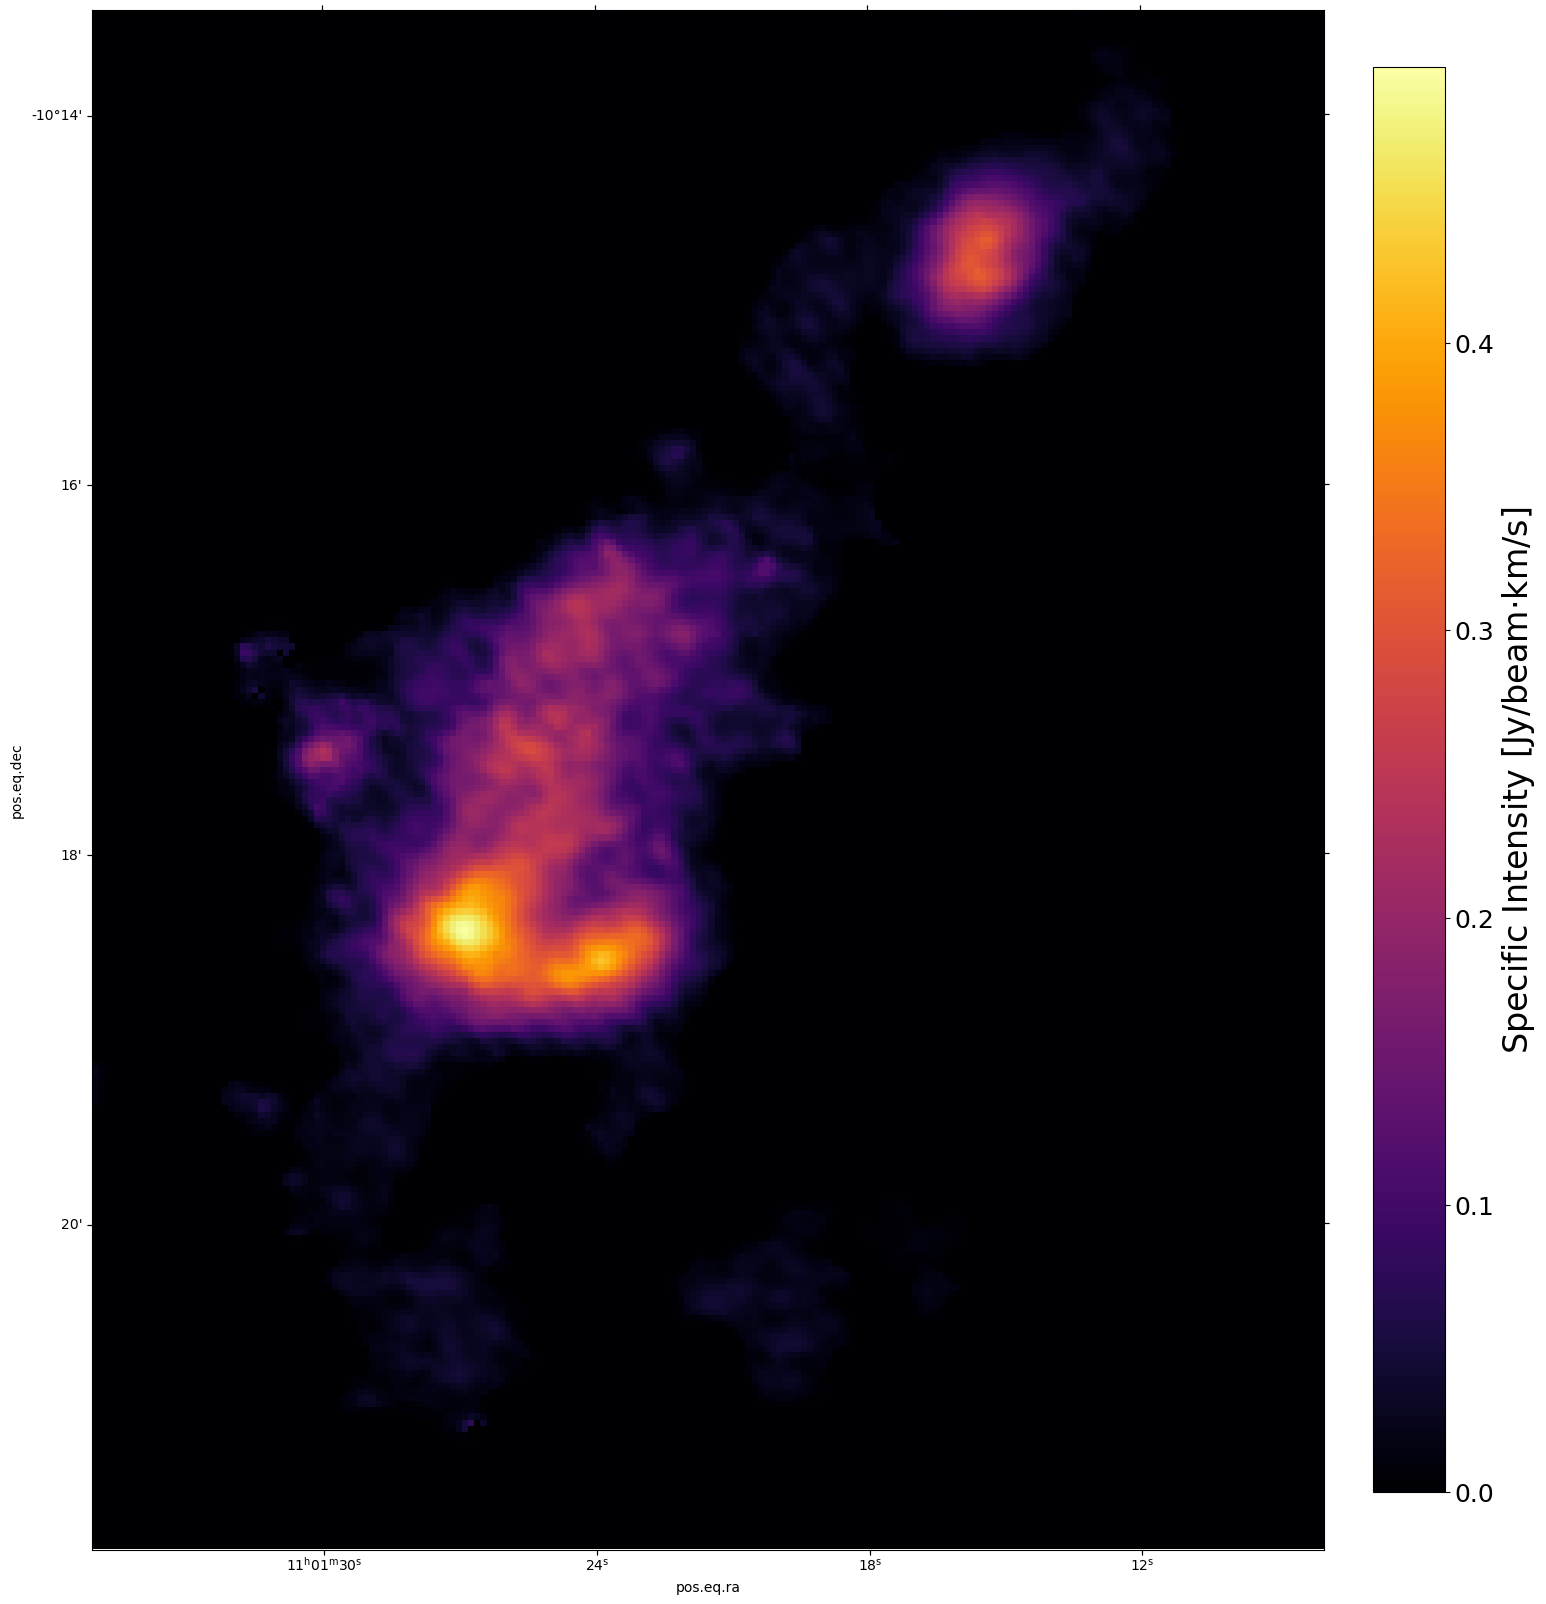

In [7]:
S1237 = data_mom0[890:1140,950:1150]
S1237_mom1 = data_mom1[890:1140,950:1150]
S1237_cube = data_image[:,890:1140,950:1150]

S1237_copy = np.copy(S1237)
S1237_copy_mom1 = np.copy(S1237_mom1)
S1237_copy_cube = np.copy(S1237_cube)
m = 250
l = 200
v = 188 
            
c.cleanloop(S1237_copy,S1237_copy_mom1,S1237_copy_cube,m,l,v,7550,8100,5)
print(mass.HI_mass(S1237_copy,Dl,Abeam,dv))
print(mass.flux(S1237_copy,Abeam,dv))
                
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy, cmap = 'inferno')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
cbar.set_label(r"Specific Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)

#plt.savefig('mom0_S1237.pdf', bbox_inches='tight')

In [ ]:
hdu = fits.PrimaryHDU(S1237_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S1237'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S1237_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S1237'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S1237_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S1237'+ext, overwrite=True)

In [ ]:
bridge = data_mom0[1050:1110,1050:1080]
bridge_mom1 = data_mom1[1050:1110,1050:1080]
bridge_cube = data_image[:,1050:1110,1050:1080]
NHI_bridge = NHI[1050:1110,1050:1080]

bridge_copy = np.copy(bridge)
bridge_copy_mom1 = np.copy(bridge_mom1)
bridge_copy_cube = np.copy(bridge_cube)
m = 60
l = 30
v = 188

            
c.cleanloop(bridge_copy,bridge_copy_mom1,bridge_copy_cube,m,l,v,7780,7850,5)
print(mass.HI_mass(bridge_copy,Dl,Abeam,dv))
print(mass.flux(bridge_copy,Abeam,dv))
print(mass.galNHI(NHI_bridge))
                
plt.figure(figsize = (20,20))
plt.imshow(bridge_copy_mom1, cmap='nipy_spectral', vmin=7750, vmax=7850)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(bridge_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_bridge'+ext, overwrite=True)
hdu = fits.PrimaryHDU(bridge_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_bridge'+ext, overwrite=True)
hdu = fits.PrimaryHDU(bridge_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_bridge'+ext, overwrite=True)

In [ ]:
cloud = data_mom0[900:950,1040:1100]
cloud_mom1 = data_mom1[900:950,1040:1100]
cloud_cube = data_image[:,900:950,1040:1100]
NHI_cloud = NHI[900:950,1040:1100]

cloud_copy = np.copy(cloud)
cloud_copy_mom1 = np.copy(cloud_mom1)
cloud_copy_cube = np.copy(cloud_cube)
m = 50
l = 60
v = 188
            
c.cleanloop(cloud_copy,cloud_copy_mom1,cloud_copy_cube,m,l,v,7750,8100,5)

print('\n')

print(mass.HI_mass(cloud_copy,Dl,Abeam,dv))
print('\n')
print(mass.flux(cloud_copy,Abeam,dv))
print('\n')
print(mass.galNHI(NHI_cloud))
print('\n')
                
plt.figure(figsize = (20,20))
plt.imshow(NHI_cloud, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(cloud_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_cloud'+ext, overwrite=True)
hdu = fits.PrimaryHDU(cloud_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_cloud'+ext, overwrite=True)
hdu = fits.PrimaryHDU(cloud_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_cloud'+ext, overwrite=True)

In [ ]:
S2 = data_mom0[1080:1140,1070:1130]
S2_mom1 = data_mom1[1080:1140,1070:1130]
S2_cube = data_image[:,1080:1140,1070:1130]
S2_NHI = NHI[1080:1140,1070:1130]

S2_copy = np.copy(S2)
S2_copy_mom1 = np.copy(S2_mom1)
S2_copy_cube = np.copy(S2_cube)
m = 60
l = 60
v = 188
            
for i in range(0,m):
    for j in range(0,l):
        flag = False
        if i > 55:
            flag = True
                
        if flag:
            S2_copy[i,j] = 0.0
            S2_copy_mom1[i,j] = math.nan      
    
c.cleanloop(S2_copy,S2_copy_mom1,S2_copy_cube,m,l,v,7725,7900,5)

for i in range(0,m):
    for j in range(0,l):
        if S2_copy[i,j] == 0.0:
            S2_NHI[i,j] = 0.0

print(mass.HI_mass(S2_copy,Dl,Abeam,dv))
print(mass.flux(S2_copy,Abeam,dv))
print(mass.galNHI(S2_NHI))

                
plt.figure(figsize = (20,20))
plt.imshow(S2_copy_mom1, cmap='nipy_spectral', vmin=7725, vmax=7900)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S2_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S2_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S2_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S2'+ext, overwrite=True)

In [ ]:
S3 = data_mom0[965:1065,970:1070]
S3_1 = data_mom1[965:1065,970:1070]
S3_cube = data_image[:,965:1065,970:1070]
S3_mask = data_mask[:,965:1065,970:1070]
S3_NHI = NHI[965:1065,970:1070]

m = 100
l = 100
v = 188

S3_copy = np.copy(S3)
S3_copy_mom1 = np.copy(S3_1)
S3_copy_cube = np.copy(S3_cube)
S3_copy_mask = np.copy(S3_mask)


for i in range(0,m):
    for j in range(0,l):
        flag = False
        if S3_copy[i,j] != 0.0:
              
            if S3_copy_mom1[i,j] < 7550 or S3_copy_mom1[i,j] > 8100:
                flag = True
            
            if j < 10 and i < 20:
                flag = True
            if j > 100 and i < 20:
                flag = True
            if i > 80 and j < 20:
                flag = True
                
            if i > 40 and i <= 60 and j< 40:
                if S3_copy_mom1[i,j] < 7800:
                    flag = True
            if i > 60 and j < 40:
                if S3_copy_mom1[i,j] < 7725:
                    flag = True
            
            if j > 60 and i < 40:
                if S3_copy_mom1[i,j] > 7920:
                    flag = True
                
            if j > 40 and i < 40:
                if S3_copy_mom1[i,j] > 7960:
                    flag = True
                
            if j > 80 and i < 30:
                flag = True
                
            if j > 20 and i < 20:
                if S3_copy_mom1[i,j] > 7960:
                    flag = True
                    
            if j > 40 and i < 10:
                flag = True
               
            if i < 5:
                if S3_copy_mom1[i,j] > 7940:
                    flag = True
                    
            if i > 80 or (j > 85 and i > 0):
                if S3_copy_mom1[i,j] > 7790:
                     flag = True
                    
            if i < 35 and j > 55:
                if S3_copy_mom1[i,j] > 7930:
                    flag = True
                    
            if j >= 98:
                flag = True
                
            if i >= 98:
                flag = True
            
            
                
        if flag:
            
            S3_copy[i,j] = 0.0
            S3_copy_mom1[i,j] = math.nan
        
#print(HI_mass(data_S3))
            

            
c.cleanloop(S3_copy,S3_copy_mom1,S3_copy_cube,m,l,v,7600,7990,5,nan=False)

#for i in range(0,m):
    #for j in range(0,l):
        #if S3_copy[i,j] == 0.0:
            #S3_NHI[i,j] = 0.0
#S3_new_mask = createmask(S3_copy_mask,S3_copy ,m,l,v)
#print('\n')
#print(mass.HI_mass(S3_copy,Dl,Abeam,dv))
#print(mass.flux(S3_copy,Abeam,dv))
print(mass.galNHI(S3_NHI))
#print('\n')



        
#S3_new_mask = c.createmask(S3_copy_mask,S3_copy ,m,l,v)


plt.figure(figsize = (10,10))
plt.imshow(S3_copy_mom1, cmap='nipy_spectral', vmin=7600, vmax=7990)
plt.colorbar()
#plt.ylim(5,25)
#plt.xlim(15,80)
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S3_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S3'+ext, overwrite=True)
##hdu = fits.PrimaryHDU(S3_copy, header=header_mom0)
#hdu.writeto(outloc+mom0+'_S3'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S3_copy_mom1, header=header_mom1)
#hdu.writeto(outloc+mom1+'_S3'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S3_new_mask, header=header_image)
#hdu.writeto(outloc+mask+'_new_S3'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S3_copy_mask, header=header_mask)
#hdu.writeto(outloc+mask+'_S3'+ext, overwrite=True)

In [ ]:
S1 = data_mom0[965:1005,1000:1060]
S1_1 = data_mom1[965:1005,1000:1060]
S1_cube = data_image[:,965:1005,1000:1060]
S1_mask = data_mask[:,965:1005,1000:1060]
S1_NHI = NHI[965:1005,1000:1060]

m = 40
l = 60
v = 188

S1_copy = np.copy(S1)
S1_copy_mom1 = np.copy(S1_1)
S1_copy_cube = np.copy(S1_cube)
S1_copy_mask = np.copy(S1_mask)

for i in range(0,m):
    for j in range(0,l):
        flag = False
        if S1_copy[i,j] != 0.0:
            
            if j < 10:
                if S1_copy_mom1[i,j] < 7970:
                    flag = True
                    
            if j< 20 and i > 15:
                if S1_copy_mom1[i,j] < 7970:
                    flag = True
                    
            if j > 30 and i < 10:
                if S1_copy_mom1[i,j] > 7990:
                    flag = True
            
            if j < 20:
                if S1_copy_mom1[i,j] < 7990:
                    flag = True
                    
            if j < 30 and i > 30:
                if S1_copy_mom1[i,j] < 7960:
                    flag = True
                
            
            if j < 25 and i > 25:
                if S1_copy_mom1[i,j] < 7955:
                    flag = True
           
            
        if flag:
            S1_copy[i,j] = 0.0
            S1_copy_mom1[i,j] = math.nan
        
print(HI_mass(data_S1))
            
                
c.cleanloop(S1_copy,S1_copy_mom1,S1_copy_cube,m,l,v,7925,8100,5)

#S1_new_mask = c.createmask(S1_copy_mask,m,l,v)
print(mass.HI_mass(S1_copy,Dl,Abeam,dv))
print(mass.flux(S1_copy,Abeam,dv))
print(mass.galNHI(S1_NHI))

            

plt.figure(figsize = (20,20))
plt.imshow(S1_copy_mom1, cmap='nipy_spectral', vmin=7925, vmax=8050)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S1_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S1'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S1_copy, header=header_mom0)
#hdu.writeto(outloc+mom0+'_S1'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S1_copy_mom1, header=header_mom1)
#hdu.writeto(outloc+mom1+'_S1'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S1_new_mask, header=header_image)
#hdu.writeto(outloc+mask+'_new_S1'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S1_copy_mask, header=header_mask)
#hdu.writeto(outloc+mask+'_S1'+ext, overwrite=True)

In [ ]:
S7 = data_mom0[1005:1045,970:1000]
S7_1 = data_mom1[1005:1045,970:1000]
S7_cube = data_image[:,1005:1045,970:1000]
S7_NHI = NHI[1005:1045,970:1000]

m = 40
l = 30
v = 188

S7_copy = np.copy(S7)
S7_copy_mom1 = np.copy(S7_1)
S7_copy_cube = np.copy(S7_cube)

c.cleanloop(S7_copy,S7_copy_mom1,S7_copy_cube,m,l,v,7550,7800,5,nan = False)

for i in range(0,m):
    for j in range(0,l):
        if S7_copy[i,j] == 0.0:
            S7_copy[i,j] = 0.0

print(mass.HI_mass(S7_copy,Dl,Abeam,dv))
print(mass.flux(S7_copy,Abeam,dv))
print(mass.galNHI(S7_NHI))
bb.add_beam(ax, header = header_mom0)
bb.add_scalebar(ax, 0.004825864436394778, label = '10 kpc',fsize = 18)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')


plt.figure(figsize = (20,20))
plt.imshow(S7_copy_mom1, cmap='nipy_spectral', vmin=7550, vmax=7800)
plt.colorbar()
#plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S7_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S7'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S7_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S7'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S7_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S7'+ext, overwrite=True)

In [ ]:
S4 = data_mom0[907:961,1211:1270]
S4_1 = data_mom1[907:961,1211:1270]
S4_cube = data_image[:,907:961,1211:1270]
S4_mask = data_mask[:,907:961,1211:1270]
S4_NHI = NHI[907:961,1211:1270]

S4_copy = np.copy(S4)
S4_copy_mom1 = np.copy(S4_1)
S4_copy_cube = np.copy(S4_cube)
S4_copy_mask = np.copy(S4_mask)

m = 54
l = 59
v = 188


for i in range(0, m):
    for j in range(0, l):
        flag = False
        if S4_copy[i,j] != 0.0:
            
                            
            if i < 2:
                flag  = True
            if j> 74:
                flag = True

        if flag:
            S4_copy[i,j] = 0.0
            S4_copy_mom1[i,j] = math.nan 
        data_S4[0,i,j] = data_S4[0,i,j]/1000
        
print(mass.HI_mass(data_S4,Dl,Abeam,dv))

                        
c.cleanloop(S4_copy,S4_copy_mom1,S4_copy_cube,m,l,v,7900,8300,4)

for i in range(0,m):
    for j in range(0,l):
        if S4_copy[i,j] == 0.0:
            S4_copy[i,j] = 0.0
            
print(mass.galNHI(S4_NHI,Dl,Abeam,dv))


plt.figure(figsize = (20,20))
plt.imshow(S4_copy_mom1, cmap='nipy_spectral', vmin = 7900, vmax = 8300)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S4_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S4_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S4_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S4'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(S4_new_mask, header=header_image)
#hdu.writeto(outloc+mask+'_new_S4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S4_copy_mask, header=header_mask)
hdu.writeto(outloc+mask+'_S4'+ext, overwrite=True)

In [ ]:
S5 = data_mom0[1100:1140,890:940]
S5_1 = data_mom1[1100:1140,890:940]
S5_cube = data_image[:,1100:1140,890:940]
#S5_NHI = NHI[1100:1140,890:940]

S5_copy = np.copy(S5)
S5_copy_mom1 = np.copy(S5_1)
S5_copy_cube = np.copy(S5_cube)

m = 40
l = 50
v = 188


for i in range(0, m):
    for j in range(0, l):
        flag = False
        if S5_copy[i,j] != 0.0:

            if j <2:
                flag = True       
    
        if flag:
            S5_copy[i,j] = 0.0
            S5_copy_mom1[i,j] = math.nan 
        data_S5[0,i,j] = data_S5[0,i,j]/1000
        
#print(mass.HI_mass(data_S5,Dl,Abeam,dv))
    
c.cleanloop(S5_copy,S5_copy_mom1,S5_copy_cube,m,l,v,7600,7850,4)   

for i in range(0,m):
    for j in range(0,l):
        if S5_copy[i,j] == 0.0:
            S5_copy[i,j] = 0.0
            
#print(mass.galNHI(S5_NHI))
                        
plt.figure(figsize = (20,20))
plt.imshow(S5_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)



In [ ]:
hdu = fits.PrimaryHDU(S5_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S5_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S5_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S5'+ext, overwrite=True)

In [ ]:
S6 = data_mom0[1130:1180,1065:1100]
S6_1 = data_mom1[1130:1180,1065:1100]
S6_cube = data_image[:,1130:1180,1065:1100]
S6_NHI = NHI[1130:1180,1065:1100]

S6_copy = np.copy(S6)
S6_copy_mom1 = np.copy(S6_1)
S6_copy_cube = np.copy(S6_cube)

m = 50
l = 35
v = 188
c.cleanloop(S6_copy,S6_copy_mom1,S6_copy_cube,m,l,v,7700,7900,4)

for i in range(0,m):
    for j in range(0,l):
        if S6_copy[i,j] == 0.0:
            S6_copy[i,j] = 0.0
        data_S6[0,i,j] = data_S6[0,i,j]/1000
        
print(mass.HI_mass(data_S6,Dl,Abeam,dv))
            
print(mass.galNHI(S6_NHI))


plt.figure(figsize = (20,20))
plt.imshow(S6_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S6_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S6_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S6_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S6'+ext, overwrite=True)

In [ ]:
S9 = data_mom0[846:851,1247:1255]
S9_1 = data_mom1[846:851,1247:1255]
S9_cube = data_image[:846:851,1247:1255]
S9_NHI = NHI[846:851,1247:1255]

S9_copy = np.copy(S9)
S9_copy_mom1 = np.copy(S9_1)
S9_copy_cube = np.copy(S9_cube)

m = 5
l = 8
v = 188

#c.cleanloop(S9_copy,S9_copy_mom1,S9_copy_cube,m,l,v,8000,8200,4)

for i in range(0,m):
    for j in range(0,l):
        if S9_copy[i,j] == 0.0:
            S9_copy[i,j] = 0.0
            
print(mass.galNHI(S9_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(S9_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S9_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S9_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S9_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S9'+ext, overwrite=True)

In [ ]:
S10 = data_mom0[830:880,1100:1150]
S10_1 = data_mom1[830:880,1100:1150]
S10_cube = data_image[:,830:880,1100:1150]
S10_NHI = NHI[830:880,1100:1150]

S10_copy = np.copy(S10)
S10_copy_mom1 = np.copy(S10_1)
S10_copy_cube = np.copy(S10_cube)

m = 50
l = 50
v = 188
c.cleanloop(S10_copy,S10_copy_mom1,S10_copy_cube,m,l,v,7700,8150,4)

for i in range(0, m):
        for j in range(0, l):
            if i > 40:
                S10_copy[i,j] = 0.0
                S10_copy_mom1[i,j] = math.nan  
                for o in range(0,189):
                    S10_copy_cube[o,i,j] = 0.0
                    
                    

for i in range(0,m):
    for j in range(0,l):
        if S10_copy[i,j] == 0.0:
            S10_copy[i,j] = 0.0
            
print(mass.galNHI(S10_NHI))
                
                

                    
plt.figure(figsize = (20,20))
plt.imshow(S10_copy_mom1, cmap='nipy_spectral')
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(S10_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_S10'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S10_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S10'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S10_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S10'+ext, overwrite=True)

In [ ]:
N1 = data_mom0[1370:1500,1160:1230]
N1_1 = data_mom1[1370:1500,1160:1230]
N1_cube = data_image[:,1370:1500,1160:1230]
N1_NHI = NHI[1370:1500,1160:1230]

N1_copy = np.copy(N1)
N1_copy_mom1 = np.copy(N1_1)
N1_copy_cube = np.copy(N1_cube)

m = 130
l = 70
v = 188

for i in range(0, m):
    for j in range(0, l):
        if N1_copy[i,j] != 0.0:
            flag = False
                
            if j<3 or i > 120:
                    flag = True
                    
        if flag:
            N1_copy[i,j] = 0.0
            N1_copy_mom1[i,j] = math.nan 
        data_N1[0,i,j] = data_N1[0,i,j]/1000
        
print(mass.HI_mass(data_N1,Dl,Abeam,dv))
            
c.cleanloop(N1_copy,N1_copy_mom1,N1_copy_cube,m,l,v,7900,8300,4)


for i in range(0,m):
    for j in range(0,l):
        if N1_copy[i,j] == 0.0:
            N1_copy[i,j] = 0.0
            
print(mass.galNHI(N1_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(N1_copy_mom1, cmap='nipy_spectral', vmin = 7900, vmax = 8300)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N1_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N1'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N1_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N1'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N1_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N1'+ext, overwrite=True)

In [ ]:
N2 = data_mom0[550:750,450:650]
N2_1 = data_mom1[550:750,450:650]
N2_cube = data_image[:,550:750,450:650]
N2_NHI = NHI[550:750,450:650]

N2_copy = np.copy(N2)
N2_copy_mom1 = np.copy(N2_1)
N2_copy_cube = np.copy(N2_cube)

m = 200
l = 200
v = 188
for i in range(0, m):
    for j in range(0, l):
        if N2_copy[i,j] != 0.0:
            flag = False

            if j > 175 or j < 5:
                    flag = True
            if i < 25:
                    flag = True
            if j > 100 and i > 120:
                flag = True
            if i < 75 and j < 75:
                flag = True
            if i > 75 and i < 85 and j < 80:
                flag = True
                
        if flag:
            N2_copy[i,j] = 0.0
            N2_copy_mom1[i,j] = math.nan 
        data_N2[0,i,j] = data_N2[0,i,j]/1000
        
print(mass.HI_mass(data_N2,Dl,Abeam,dv))
            
c.cleanloop(N2_copy,N2_copy_mom1,N2_copy_cube,m,l,v,7700,8300,4)

for i in range(0,m):
    for j in range(0,l):
        if N2_copy[i,j] == 0.0:
            N2_copy[i,j] = 0.0
            
print(mass.galNHI(N2_NHI))

plt.figure(figsize = (20,20))
plt.imshow(N2_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N2_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N2_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N2_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N2'+ext, overwrite=True)

In [ ]:
N3 = data_mom0[530:570,1010:1060]
N3_1 = data_mom1[530:570,1010:1060]
N3_cube = data_image[:,530:570,1010:1060]

N3_copy = np.copy(N3)
N3_copy_mom1 = np.copy(N3_1)
N3_copy_cube = np.copy(N3_cube)

m = 40
l = 50
v = 188

c.cleanloop(N3_copy,N3_copy_mom1,N3_copy_cube,m,l,v,8000,8200,4)

N3_NHI = NHI[530:570,1010:1060]

for i in range(0,m):
    for j in range(0,l):
        if N3_copy[i,j] == 0.0:
            N3_copy[i,j] = 0.0
        data_N3[0,i,j] = data_N3[0,i,j]/1000
        
print(mass.HI_mass(data_N3,Dl,Abeam,dv))
            
print(mass.galNHI(N3_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(N3_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N3_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N3'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N3_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N3'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N3_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N3'+ext, overwrite=True)

In [ ]:
N4 = data_mom0[1970:2020,580:630]
N4_1 = data_mom1[1970:2020,580:630]
N4_cube = data_image[:,1970:2020,580:630]
N4_NHI = NHI[1970:2020,580:630]

N4_copy = np.copy(N4)
N4_copy_mom1 = np.copy(N4_1)
N4_copy_cube = np.copy(N4_cube)

m = 50
l = 50
v = 188

for i in range(0, m):
    for j in range(0, l):
        if N4_copy[i,j] != 0.0:
            flag = False

            if i > 48:
                flag = True
        if flag:
            N4_copy[i,j] = 0.0
            N4_copy_mom1[i,j] = math.nan  

c.cleanloop(N4_copy,N4_copy_mom1,N4_copy_cube,m,l,v,7850,8200,4)

for i in range(0,m):
    for j in range(0,l):
        if N4_copy[i,j] == 0.0:
            N4_copy[i,j] = 0.0
            
print(mass.galNHI(N4_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(N4_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N4_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N4_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N4_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N4'+ext, overwrite=True)

In [ ]:
N5 = data_mom0[150:190,800:850]
N5_1 = data_mom1[150:190,800:850]
N5_cube = data_image[:,150:190,800:850]
N5_NHI = NHI[150:190,800:850]

N5_copy = np.copy(N5)
N5_copy_mom1 = np.copy(N5_1)
N5_copy_cube = np.copy(N5_cube)

m = 40
l = 50
v = 188

for i in range(0, m):
    for j in range(0, l):
        if N5_copy[i,j] != 0.0:
            flag = False
                
            if j >= 39 or i > 49:
                flag = True
        if flag:
            N5_copy[i,j] = 0.0
            N5_copy_mom1[i,j] = math.nan  
                    
c.cleanloop(N5_copy,N5_copy_mom1,N5_copy_cube,m,l,v,8000,8250,4)

for i in range(0,m):
    for j in range(0,l):
        if N5_copy[i,j] == 0.0:
            N5_copy[i,j] = 0.0
            
print(mass.galNHI(N5_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(N5_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N5_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N5_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N5_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N5'+ext, overwrite=True)

In [ ]:
N6 = data_mom0[0:40,2000:2048]
N6_1 = data_mom1[0:40,2000:2048]
N6_cube = data_image[:,0:40,2000:2048]

N6_copy = np.copy(N6)
N6_copy_mom1 = np.copy(N6_1)
N6_copy_cube = np.copy(N6_cube)

m = 40
l = 48
v = 188

for i in range(0, m):
    for j in range(0, l):
        if N6_copy[i,j] != 0.0:
            flag = False

            if i >= 15 and j <= 5:
                flag = True
                
            if j < 10 and i < 10:
                if N6_copy_mom1[i,j] > 8100:
                    flag = True
                    
        if flag:
            N6_copy[i,j] = 0.0
            N6_copy_mom1[i,j] = math.nan  
                
c.cleanloop(N6_copy,N6_copy_mom1,N6_copy_cube,m,l,v,7700,8300,4)

N6_NHI = NHI[0:40,2000:2048]

for i in range(0,m):
    for j in range(0,l):
        if N6_copy[i,j] == 0.0:
            N6_copy[i,j] = 0.0
            
print(mass.galNHI(N6_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(N6_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N6_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N6_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N6_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N6'+ext, overwrite=True)

In [ ]:
N7 = data_mom0[900:950,410:450]
N7_1 = data_mom1[900:950,410:450]
N7_cube = data_image[:,900:950,410:450]

N7_copy = np.copy(N7)
N7_copy_mom1 = np.copy(N7_1)
N7_copy_cube = np.copy(N7_cube)

m = 50
l = 40
v = 188

for i in range(0, m):
    for j in range(0, l):
        if N7_copy[i,j] != 0.0:
            flag = False

            if i > 25 and j < 20:
                if N7_copy_mom1[i,j] > 8400:
                    flag = True
                    
        if flag:
            N7_copy[i,j] = 0.0
            N7_copy_mom1[i,j] = math.nan  

c.cleanloop(N7_copy,N7_copy_mom1,N7_copy_cube,m,l,v,8200,8500,4)

N7_NHI = NHI[900:950,410:450]

for i in range(0,m):
    for j in range(0,l):
        if N7_copy[i,j] == 0.0:
            N7_copy[i,j] = 0.0
            
print(mass.galNHI(N7_NHI))
 
                    
plt.figure(figsize = (20,20))
plt.imshow(N7_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N7_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N7'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N7_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N7'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N7_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N7'+ext, overwrite=True)

In [ ]:
N8 = data_mom0[1345:1365,1760:1785]
N8_1 = data_mom1[1345:1365,1760:1785]
N8_cube = data_image[:,1345:1365,1760:1785]

N8_copy = np.copy(N8)
N8_copy_mom1 = np.copy(N8_1)
N8_copy_cube = np.copy(N8_cube)

m = 20
l = 25
v = 188

c.cleanloop(N8_copy,N8_copy_mom1,N8_copy_cube,m,l,v,8100,8250,4)

N8_NHI = NHI[1345:1365,1760:1785]

for i in range(0,m):
    for j in range(0,l):
        if N8_copy[i,j] == 0.0:
            N8_copy[i,j] = 0.0
            
print(mass.galNHI(N8_NHI))

plt.figure(figsize = (20,20))
plt.imshow(N8_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N8_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N8'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N8_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N8'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N8_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N8'+ext, overwrite=True)

In [ ]:
N9 = data_mom0[1268:1290,1138:1166]
N9_1 = data_mom1[1268:1290,1138:1166]
N9_cube = data_image[:,1268:1290,1138:1166]

N9_copy = np.copy(N9)
N9_copy_mom1 = np.copy(N9_1)
N9_copy_cube = np.copy(N9_cube)

m = 22
l = 28
v = 188

c.cleanloop(N9_copy,N9_copy_mom1,N9_copy_cube,m,l,v,7700,7900,4)

N9_NHI = NHI[1268:1290,1138:1166]

for i in range(0,m):
    for j in range(0,l):
        if N9_copy[i,j] == 0.0:
            N9_copy[i,j] = 0.0
            
print(mass.galNHI(N9_NHI))
                    
plt.figure(figsize = (20,20))
plt.imshow(N9_copy_mom1, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
hdu = fits.PrimaryHDU(N9_copy_cube, header=header_image)
hdu.writeto(outloc+image+'_N9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N9_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N9_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N9'+ext, overwrite=True)

In [ ]:
sigma = 2.5
S1_mom0 = gaussian_filter(S1_mom0, sigma)
S2_mom0 = gaussian_filter(S2_mom0, sigma)
S3_mom0 = gaussian_filter(S3_mom0, sigma)
S4_mom0 = gaussian_filter(S4_mom0, sigma)
S5_mom0 = gaussian_filter(S5_mom0, sigma)
S6_mom0 = gaussian_filter(S6_mom0, sigma)
S7_mom0 = gaussian_filter(S7_mom0, sigma)
S9_mom0 = gaussian_filter(S9_mom0, sigma)
S10_mom0 = gaussian_filter(S10_mom0, sigma)
N1_mom0 = gaussian_filter(N1_mom0, sigma)
N2_mom0 = gaussian_filter(N2_mom0, sigma)
N3_mom0 = gaussian_filter(N3_mom0, sigma)
N4_mom0 = gaussian_filter(N4_mom0, sigma)
N5_mom0 = gaussian_filter(N5_mom0, sigma)
N6_mom0 = gaussian_filter(N6_mom0, sigma)
N7_mom0 = gaussian_filter(N7_mom0, sigma)
N8_mom0 = gaussian_filter(N8_mom0, sigma)
N9_mom0 = gaussian_filter(N9_mom0, sigma)

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(full0, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = header_mom0)
add_scalebar(ax,0.24129322181973886, label = '500 kpc',fsize = 18)


ax.contour(S1_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S2_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S3_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S4_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S5_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S6_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S7_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S7_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S2_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S3_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S1_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S7_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S2_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(S9_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N1_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N2_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N3_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N4_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N5_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N6_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N7_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N8_mom0, levels=[0.01], colors = 'red',linewidths = 2)
ax.contour(N9_mom0, levels=[0.01], colors = 'red',linewidths = 2)




lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

#plt.savefig('mom0S3.pdf', bbox_inches='tight')

In [ ]:
sweet = data_mom0[730:1180,836:1286]
sweet1 = data_mom1[730:1180,836:1286]
sweet_cube = data_image[:,730:1180,836:1286]
sweet_copy = np.copy(sweet)
sweet_copy_mom1 = np.copy(sweet1)
sweet_copy_cube = np.copy(sweet_cube)

m = 450
l = 450
v = 188
                    

c.cleanloop(sweet_copy,sweet_copy_mom1,sweet_copy_cube,m,l,v,7700,7900,4)
print(mass.HI_mass(sweet_copy,Dl,Abeam,dv))
print(mass.flux(sweet_copy,Abeam,dv))


fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(header_mom0))
im = ax.imshow(np.abs(sweet_copy)**0.7, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
bb.add_beam(ax, header = header_mom0)
bb.add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('07mom0.pdf', bbox_inches='tight')